In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import mudata as md
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from liana.method.sp._misty import plot_distance_weights, plot_neighbors, _gauss_weight, _exponential_weight

### Distance Weights

Gaussian Kernel

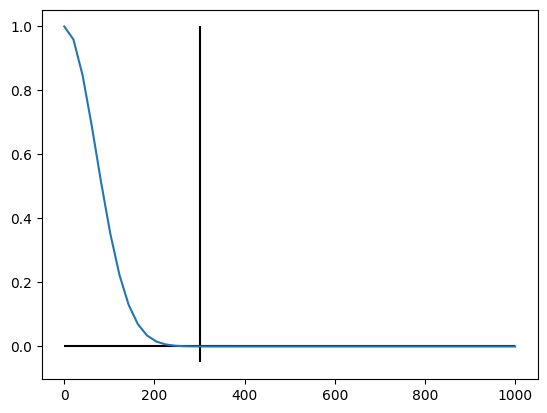

In [3]:
x = np.linspace(0, 1000)
plt.vlines(x=300, ymin=-0.05, ymax=1, color="black")
plt.hlines(xmin=0, xmax=1000, y=0, color="black")
plt.plot(x, _gauss_weight(x, l=100))
plt.show()

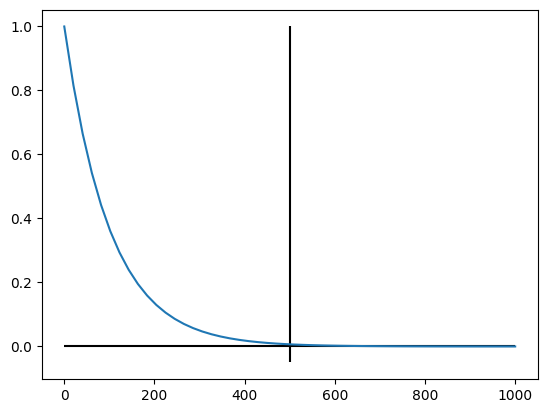

In [4]:
# when is the exponential kernel pretty much zero?
x = np.linspace(0, 1000)
plt.vlines(x=500, ymin=-0.05, ymax=1, color="black")
plt.hlines(xmin=0, xmax=1000, y=0, color="black")
plt.plot(x, _exponential_weight(x, l=100))
plt.show()

### Visium Data

In [5]:
adata = md.read_h5ad("../data/f4hr.h5ad", mod="cytosig", backed=False)
adata

AnnData object with n_obs × n_vars = 1847 × 43
    obs: 'sample', 'leiden'
    uns: 'log1p', 'spatial'
    obsm: 'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'

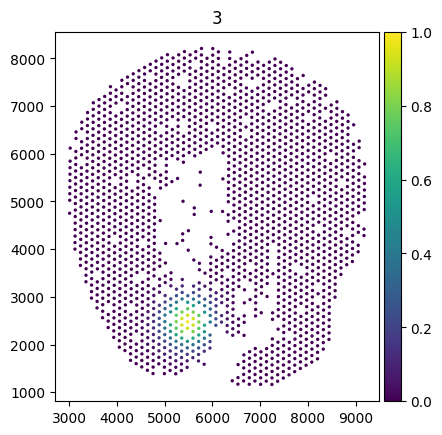

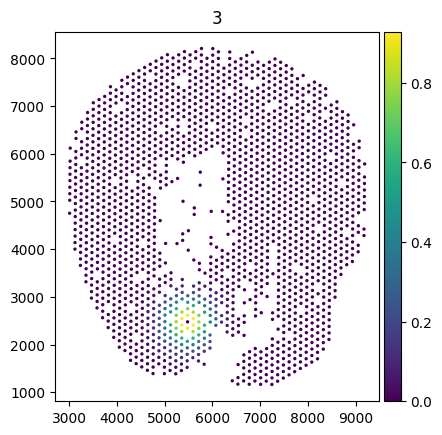

In [6]:
plot_distance_weights(adata, bandwidth=500, cells=[3], add_self=True, s=2)
plot_distance_weights(adata, bandwidth=500, cells=[3], add_self=False, s=2)

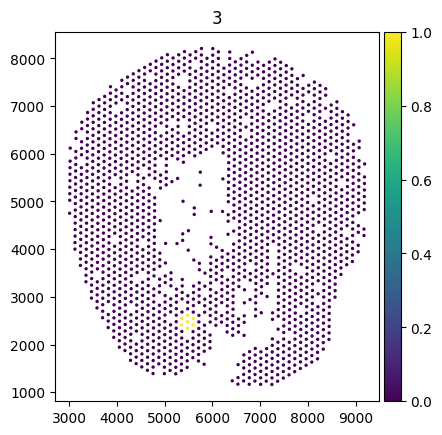

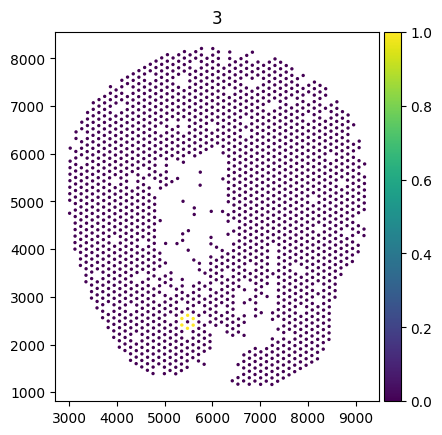

In [7]:
plot_neighbors(adata, cells=[3], add_self=True, s=2)
plot_neighbors(adata, cells=[3], add_self=False, s=2)

### MIBI

In [8]:
adata = sq.datasets.mibitof()
adata = adata[adata.obs.batch == "0"]
adata

View of AnnData object with n_obs × n_vars = 1241 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2'
    uns: 'Cluster_colors', 'batch_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'X_scanorama', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

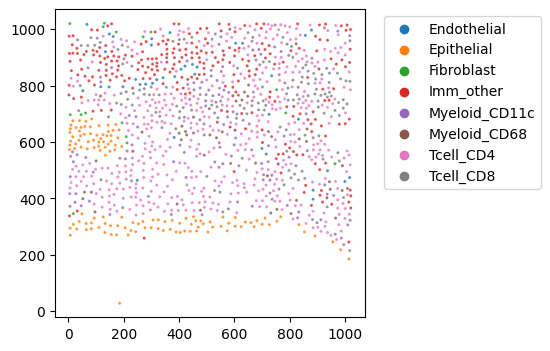

In [9]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=[4, 4])
sns.scatterplot(x=adata.obsm["spatial"][:,0],
                y=adata.obsm["spatial"][:,1],
                hue=adata.obs.Cluster,
                alpha=0.8, s=5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

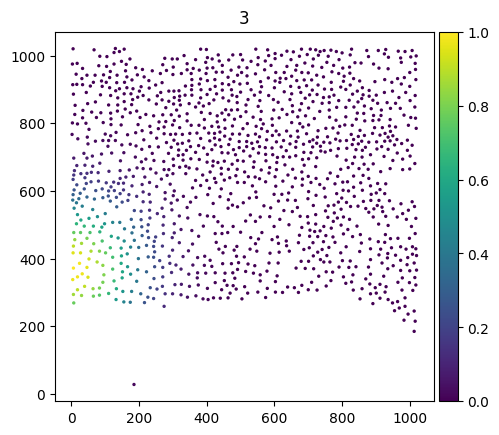

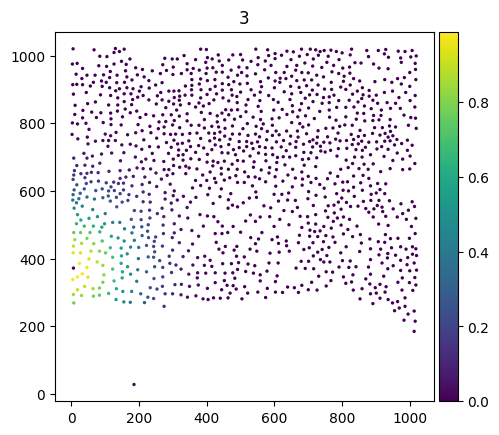

In [10]:
plot_distance_weights(adata, bandwidth=200, cells=[3], add_self=True, s=2)
plot_distance_weights(adata, bandwidth=200, cells=[3], add_self=False, s=2)

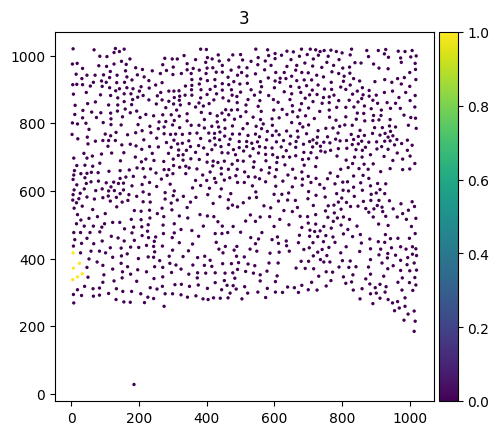

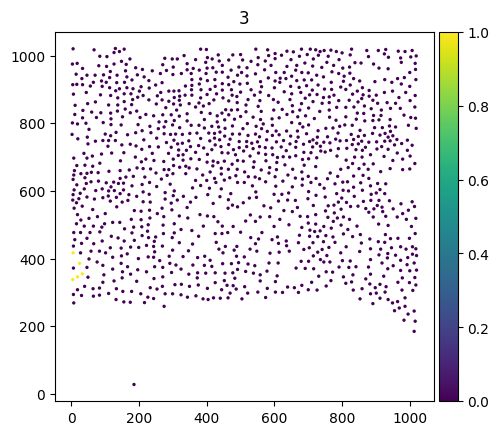

In [11]:
plot_neighbors(adata, cells=[3], add_self=True, s=2)
plot_neighbors(adata, cells=[3], add_self=False, s=2)

### MERFISH

In [12]:
adata = sq.datasets.merfish()
adata = adata[adata.obs.batch == "0"]
adata

View of AnnData object with n_obs × n_vars = 6509 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

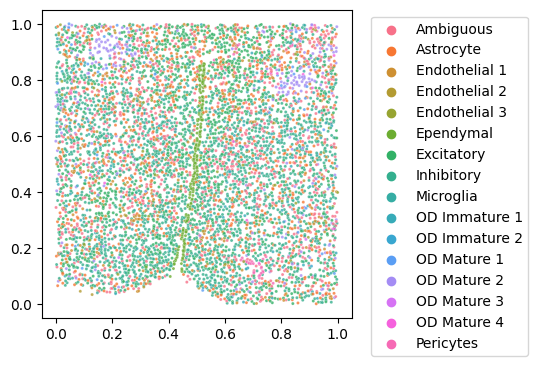

In [13]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=[4, 4])
sns.scatterplot(x=adata.obsm["spatial"][:,0],
                y=adata.obsm["spatial"][:,1],
                hue=adata.obs.Cell_class,
                alpha=0.8, s=5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

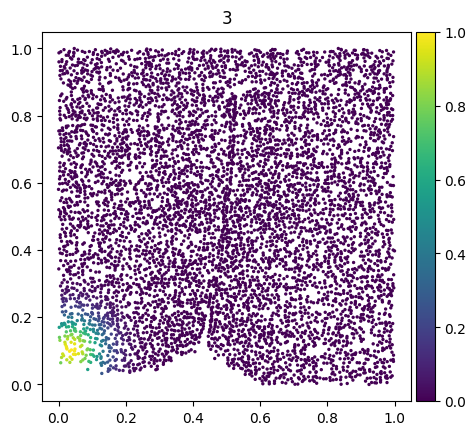

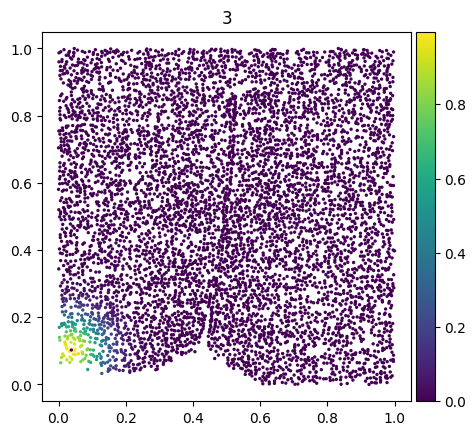

In [14]:
plot_distance_weights(adata, bandwidth=0.1, cells=[3], add_self=True, s=2)
plot_distance_weights(adata, bandwidth=0.1, cells=[3], add_self=False, s=2)

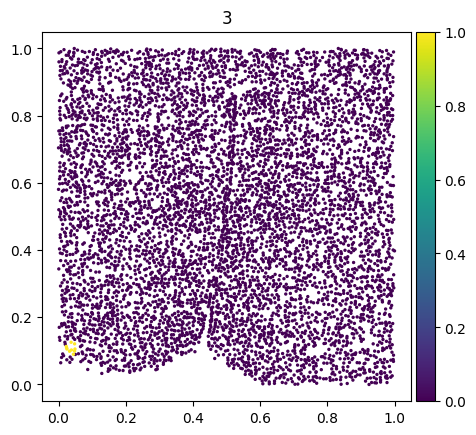

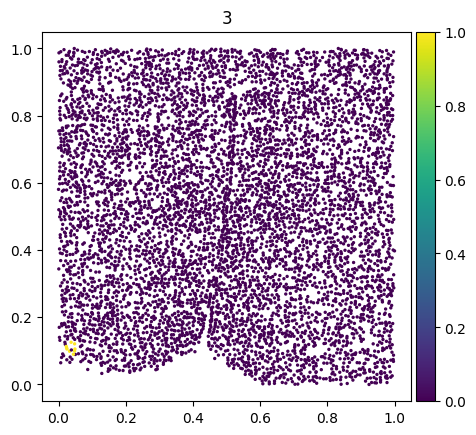

In [15]:
plot_neighbors(adata, cells=[3], add_self=True, s=2)
plot_neighbors(adata, cells=[3], add_self=False, s=2)